# Naive Bayes Classifier

 1) Use sklearn NB on continuous data   
 
 2) Code Gaussian NB on countinous data
 
 3) Use sklearn NB on textual data

 ### 1) Use sklearn NB on continuous data 

In [50]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB, MultinomialNB

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [51]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [52]:
data = pd.DataFrame(cancer['data'], columns = cancer['feature_names']) 
data["label"] = cancer["target"]
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [53]:
data = data[["mean radius", 
             "mean texture", 
             "mean perimeter", 
             "mean area", 
             "mean smoothness",
             "label"]]
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,label
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [54]:
data["label"].value_counts()

1    357
0    212
Name: label, dtype: int64

---
To handle imbalanced data set, we can use oversampling, undersampling, or SMOTE

https://towardsdatascience.com/oversampling-and-undersampling-5e2bbaf56dcf

https://towardsdatascience.com/smote-fdce2f605729

---

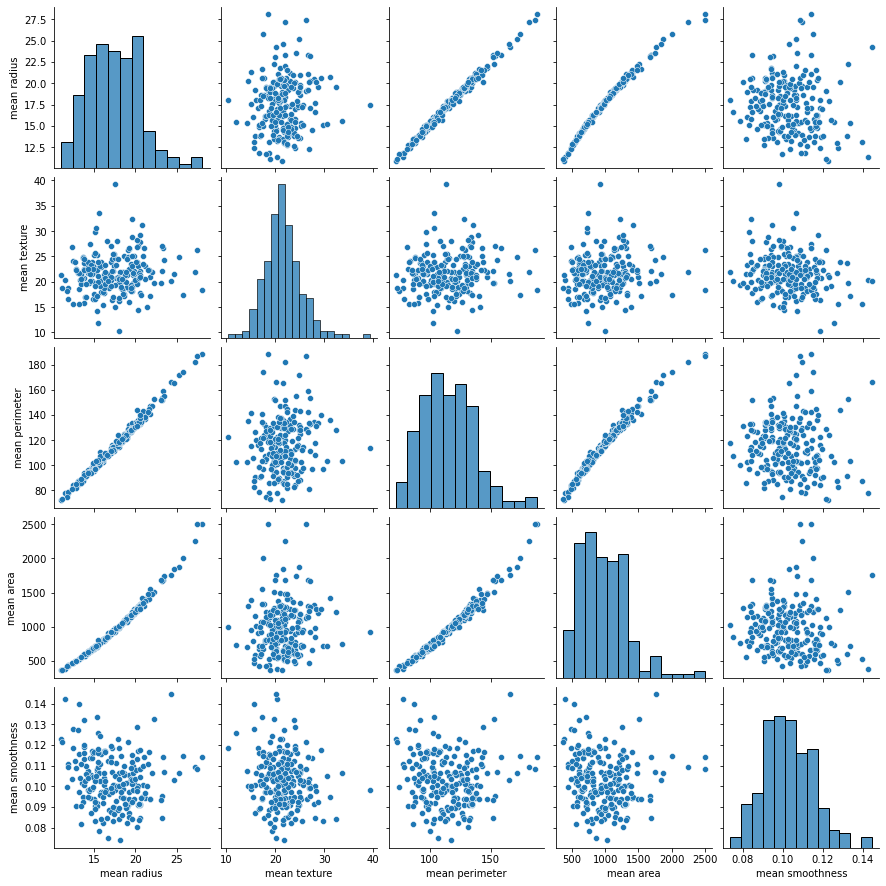

In [55]:
sns.pairplot(data[data.label==0].iloc[:,:-1]);

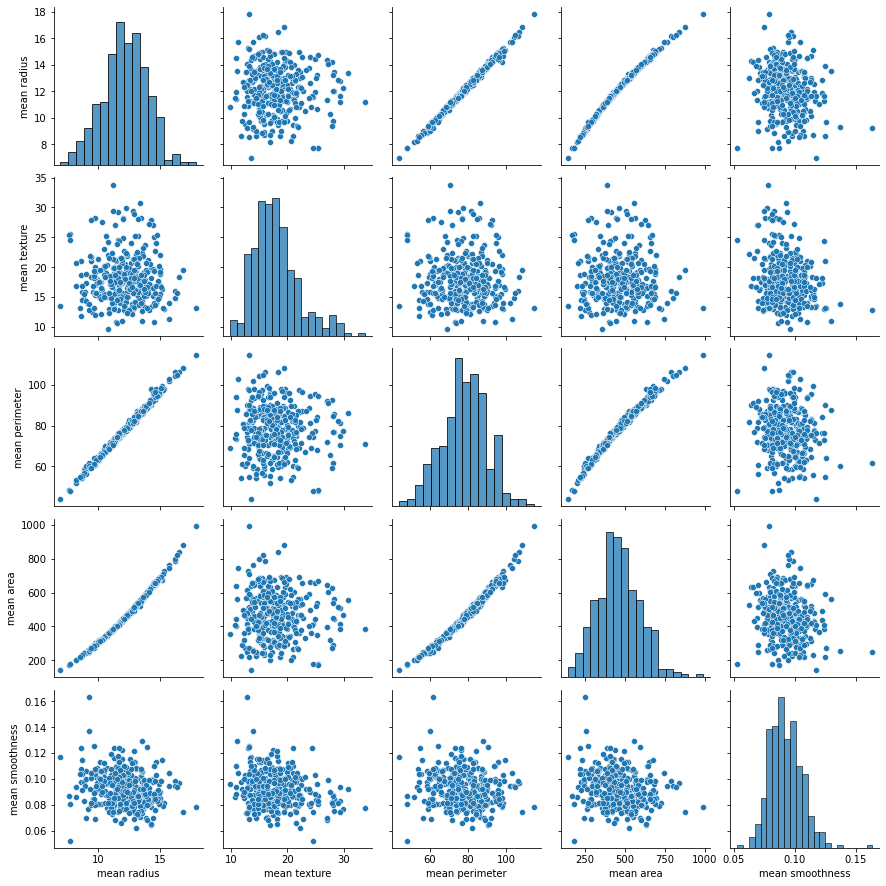

In [56]:
sns.pairplot(data[data.label==1].iloc[:,:-1]);

In [57]:
data = data[["mean radius", "mean texture", "mean smoothness", "label"]]
data.head()

,mean radius,mean texture,mean smoothness,label
0,17.99,10.38,0.11840,0
1,20.57,17.77,0.08474,0
2,19.69,21.25,0.10960,0
3,11.42,20.38,0.14250,0
4,20.29,14.34,0.10030,0


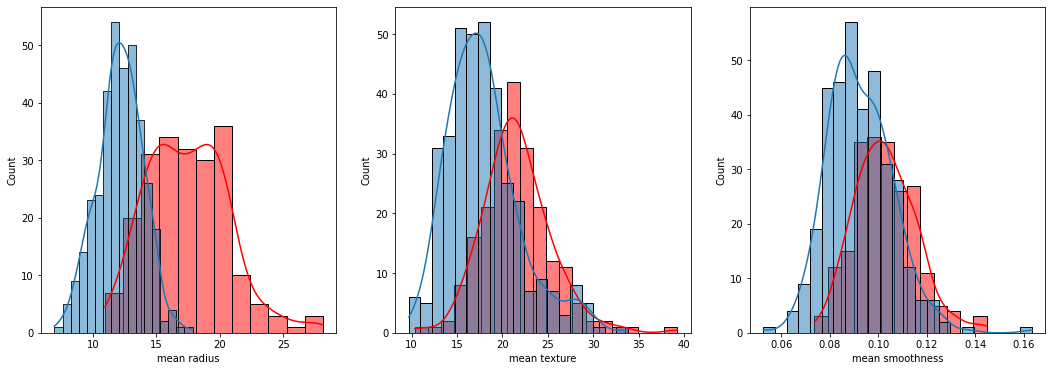

In [58]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.histplot(data[data.label==0], ax=axes[0], x="mean radius", kde=True, color="r")
sns.histplot(data[data.label==1], ax=axes[0], x="mean radius", kde=True)

sns.histplot(data[data.label==0], ax=axes[1], x="mean texture", kde=True, color="r")
sns.histplot(data[data.label==1], ax=axes[1], x="mean texture", kde=True);

sns.histplot(data[data.label==0], ax=axes[2], x="mean smoothness", kde=True, color="r")
sns.histplot(data[data.label==1], ax=axes[2], x="mean smoothness", kde=True);

In [59]:
X = data.drop(columns=["label"])
y = data["label"]

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [61]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [62]:
y_pred = model.predict(X_test)

In [63]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[36  4]
 [ 0 74]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        40
           1       0.95      1.00      0.97        74

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



 ## 2) Code Gaussian NB on countinous data

In [64]:
# Find P(y) -- PRIOR

def find_prior(df, y):
    classes = sorted((df[y].unique()))
    prior = []
    for i in classes:
        prior.append(len(df[df[y]==i])/len(df))
    return prior

In [65]:
sorted(data["label"].unique())

[0, 1]

In [66]:
len(data[data["label"]==0])

212

In [67]:
find_prior(data, "label")

[0.37258347978910367, 0.6274165202108963]

In [68]:
# Find P(x|y)  -- LIKELIHOOD

def find_likelihood_gaussian(df, feature_name, feature_value, y, label):
    df = df[df[y]==label]
    mean = df[feature_name].mean()
    std = df[feature_name].std()
    P_x_given_y = (1/np.sqrt(2*np.pi)*std) * np.exp(-((feature_value-mean)**2 /(2*std**2)))
    return P_x_given_y

In [69]:
# Find P(x1|y) * P(x2|y) * ... * P(xd|y) * P(y) -- NUMERATOR IN THE POSTERIOR

# Find y for which the above quantity is max

def My_NBGaussian(df, X_test, y):
    
    # Get feature names
    features = list(df.columns)[:-1]

    # Find prior
    prior = find_prior(df, y)

    y_pred = []
    
    # Loop over the entire training data set
    for x in X_test:
        # Find likelihood
        labels = sorted(list(df[y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= find_likelihood_gaussian(df, features[i], x[i], y, labels[j])

        # Find posterior (numerator only) for each label
        posterior = [1]*len(labels)
        for j in range(len(labels)):
            posterior[j] = likelihood[j] * prior[j]
        
        # Find y for which the posterior is max
        y_pred.append(np.argmax(posterior))

    return np.array(y_pred) 

In [70]:
train, test = train_test_split(data, test_size=0.2, random_state=41)

X_test = test.iloc[:,:-1].to_numpy()
y_test = test.iloc[:,-1].to_numpy()

y_pred = My_NBGaussian(train, X_test, "label")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[40  0]
 [ 5 69]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        40
           1       1.00      0.93      0.97        74

    accuracy                           0.96       114
   macro avg       0.94      0.97      0.95       114
weighted avg       0.96      0.96      0.96       114



###  3) Use sklearn NB on textual data

In [71]:
url = "https://raw.githubusercontent.com/bigmlcom/python/master/data/spam.csv"
dataset = pd.read_csv(url, delimiter='\t')
dataset

,Type,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
651,ham,Anything lor. Juz both of us lor.
652,ham,Get me out of this dump heap. My mom decided t...
653,ham,Ok lor... Sony ericsson salesman... I ask shuh...
654,ham,Ard 6 like dat lor.


In [72]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Type     656 non-null    object
 1   Message  656 non-null    object
dtypes: object(2)
memory usage: 10.4+ KB


In [73]:
counts = dataset['Type'].value_counts()
counts

ham     577
spam     79
Name: Type, dtype: int64

### Data Visualization

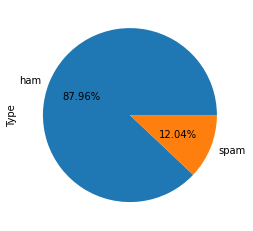

In [74]:
counts.plot(kind='pie', autopct='%.2f%%'); 

---

Let’s plot the histogram of messages with respect to the number of words they contain.

---

In [75]:
dataset['Message'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [76]:
print(dataset['Message'][0].split())

['Go', 'until', 'jurong', 'point,', 'crazy..', 'Available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet...', 'Cine', 'there', 'got', 'amore', 'wat...']


In [77]:
len(dataset['Message'][0].split())

20

---

Tokenization, removing punctuation, removing stop words, removing numbers, making all words lower case, 
stemming/lemmatization

---

In [78]:
# The following script creates a list that contains a number of words in ham messages

dataset_ham = dataset[dataset['Type'] == "ham"]
dataset_ham_count = dataset_ham['Message'].str.split().str.len()
dataset_ham_count       

# dispays the index of the message in the data set and the number of words it contains

0      20
1       6
3      11
4      13
6      16
       ..
651     7
652    15
653    18
654     5
655    15
Name: Message, Length: 577, dtype: int64

In [79]:
dataset_spam = dataset[dataset['Type'] == "spam"]
dataset_spam_count = dataset_spam['Message'].str.split().str.len()
dataset_spam_count

2      28
5      32
8      26
9      29
11     26
       ..
615    25
617    18
628    16
631    33
638    28
Name: Message, Length: 79, dtype: int64

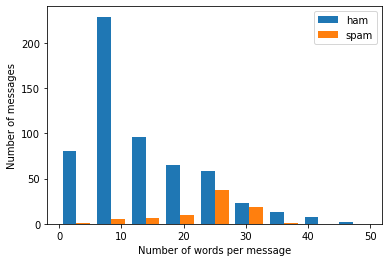

In [80]:
plt.hist([dataset_ham_count, dataset_spam_count], 
         bins = np.linspace(0, 50, 10), 
         label = ['ham', 'spam'])
plt.xlabel('Number of words per message')
plt.ylabel('Number of messages')
plt.legend();

----

Let's create a word cloud to see which message is spam and which is not

We need to have text to plot this, so we will combine all the words from all spam messages together

---

In [94]:
#! pip install wordcloud

from wordcloud import WordCloud

spam_words = ''

for message in dataset_spam["Message"]:
     text = message.lower()
     tokens = text.split()
     for words in tokens:
         spam_words = spam_words + words + ' '
        
spam_words 

'free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&c\'s apply 08452810075over18\'s freemsg hey there darling it\'s been 3 week\'s now and no word back! i\'d like some fun you up for it still? tb ok! xxx std chgs to send, £1.50 to rcv winner!! as a valued network customer you have been selected to receivea £900 prize reward! to claim call 09061701461. claim code kl341. valid 12 hours only. had your mobile 11 months or more? u r entitled to update to the latest colour mobiles with camera for free! call the mobile update co free on 08002986030 six chances to win cash! from 100 to 20,000 pounds txt> csh11 and send to 87575. cost 150p/day, 6days, 16+ tsandcs apply reply hl 4 info urgent! you have won a 1 week free membership in our £100,000 prize jackpot! txt the word: claim to no: 81010 t&c www.dbuk.net lccltd pobox 4403ldnw1a7rw18 500 new mobiles from 2004, must go! txt: nokia to no: 89545 & collect yours today!fr

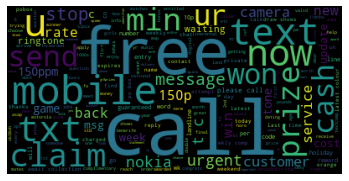

In [82]:
spam_wordcloud = WordCloud().generate(spam_words)

plt.imshow(spam_wordcloud)
plt.axis("off");

### Create a NB classifier

In [83]:
X = dataset["Message"]  
 
y = dataset["Type"]

In [84]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()

X = vect.fit_transform(X)

X

<656x2551 sparse matrix of type '<class 'numpy.int64'>'
	with 8542 stored elements in Compressed Sparse Row format>

In [85]:
656*2551

1673456

In [86]:
8542/1673456

0.005104406688912048

In [87]:
X.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [88]:
pd.DataFrame(X.todense(), 
             columns=vect.get_feature_names_out(), 
             index=dataset['Message'])

,000,008704050406,0121,01223585334,02,0207,02073162414,03,04,06,...,yun,yuo,yup,zaher,zed,zindgi,zogtorius,zyada,èn,〨ud
Message,,,,,,,,,,,,,,,,,,,,,
"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ok lar... Joking wif u oni...,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
U dun say so early hor... U c already then say...,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Nah I don't think he goes to usf, he lives around here though",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Anything lor. Juz both of us lor.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Get me out of this dump heap. My mom decided to come to lowes. BORING.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ok lor... Sony ericsson salesman... I ask shuhui then she say quite gd 2 use so i considering...,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [96]:
model = MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [97]:
y_pred = model.predict(X_test)

print(confusion_matrix(y_test,y_pred)) 
print(classification_report(y_test,y_pred)) 

[[170   5]
 [  2  20]]
              precision    recall  f1-score   support

         ham       0.99      0.97      0.98       175
        spam       0.80      0.91      0.85        22

    accuracy                           0.96       197
   macro avg       0.89      0.94      0.92       197
weighted avg       0.97      0.96      0.97       197



In [92]:
new_messages = [
    "Congratulations! Check out your prize at http://hguyfuyfougtouit.com",
    "Hi professor, can you replace my midterm with the final exam?"
]
vect_messages = vect.transform(new_messages)
model.predict(vect_messages)

array(['spam', 'ham'], dtype='<U4')